# MNISTデータの学習

In [0]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# シグモイド関数
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def deriv_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

In [0]:
# Softmax関数
def softmax(x):
    exp_x = np.exp(x)
    return exp_x/np.sum(exp_x, axis=1, keepdims=True)

In [0]:
# 交差エントロピー誤差
def cross_entropy_error(y, t):
    return np.sum(-t*np.log(y)-(1-t)*np.log(1-y))

In [0]:
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size):
        
        # 重みの初期化
        self.params = {}
        self.params['W1'] = np.random.uniform(low=-0.08, high=0.08, \
                            size=(input_size, hidden_size)).astype('float32')
        self.params['b1'] = np.zeros(hidden_size).astype('float32')
        self.params['W2'] = np.random.uniform(low=-0.08, high=0.08, \
                            size=(hidden_size, output_size)).astype('float32')
        self.params['b2'] = np.zeros(output_size).astype('float32')
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        # forward
        u1 = np.matmul(x, W1) + b1
        z1 = sigmoid(u1)
        u2 = np.matmul(z1, W2) + b2
        y = softmax(u2)
        
        return y
    
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        u1 = np.matmul(x, W1) + b1
        z1 = sigmoid(u1)
        u2 = np.matmul(z1, W2) + b2
        y = softmax(u2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.matmul(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        du1 = np.matmul(dy, W2.T)
        dz1 = deriv_sigmoid(u1) * du1
        grads['W1'] = np.matmul(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)
        
        return grads
    

In [0]:
# MNISTデータのロードと訓練データ、テストデータの分割
def load_mnist():
    mnist = fetch_mldata('MNIST original')
    mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                               mnist.target.astype('int32'), random_state=42)
    
    mnist_X = mnist_X / 255.0
    
    # one-hot表現に変換
    mnist_y = np.eye(10)[mnist_y]

    return train_test_split(mnist_X, mnist_y,
                test_size=0.2,
                random_state=42)

In [0]:
# それぞれのデータの形式を出力
x_train, x_test, y_train, y_test = load_mnist()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(56000, 784)
(56000, 10)
(14000, 784)
(14000, 10)


In [0]:
network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [0]:
# ハイパーパラメーター
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.01

In [0]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

In [0]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 誤差逆伝搬法によって勾配を求める
    grad = network.gradient(x_batch, y_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= lr * grad[key]
        
    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, y_train)
        test_acc = network.accuracy(x_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("訓練データの正解率:" + str(train_acc) \
              + " テストデータの正解率:" + str(test_acc))
        print("loss = {0}".format(loss))

訓練データの正解率:0.0988214285714 テストデータの正解率:0.0958571428571
loss = 328.7733893916011
訓練データの正解率:0.536178571429 テストデータの正解率:0.535214285714
loss = 305.17781694978476
訓練データの正解率:0.700517857143 テストデータの正解率:0.698
loss = 274.13002975285053
訓練データの正解率:0.734964285714 テストデータの正解率:0.735071428571
loss = 223.30563200684264
訓練データの正解率:0.777607142857 テストデータの正解率:0.773928571429
loss = 195.4886877128738
訓練データの正解率:0.807589285714 テストデータの正解率:0.803642857143
loss = 160.1626076256216
訓練データの正解率:0.826178571429 テストデータの正解率:0.821
loss = 144.15770573013288
訓練データの正解率:0.837517857143 テストデータの正解率:0.832642857143
loss = 135.4175645377909
訓練データの正解率:0.850607142857 テストデータの正解率:0.847285714286
loss = 117.97991994441145
訓練データの正解率:0.856 テストデータの正解率:0.855214285714
loss = 109.68457126553949
訓練データの正解率:0.863446428571 テストデータの正解率:0.8635
loss = 93.183624066829
訓練データの正解率:0.868785714286 テストデータの正解率:0.869142857143
loss = 94.6760090600751
訓練データの正解率:0.874285714286 テストデータの正解率:0.874285714286
loss = 78.11383621369964
訓練データの正解率:0.876392857143 テストデータの正解率:0.8760

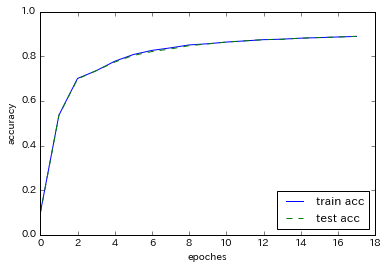

In [0]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epoches")
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()